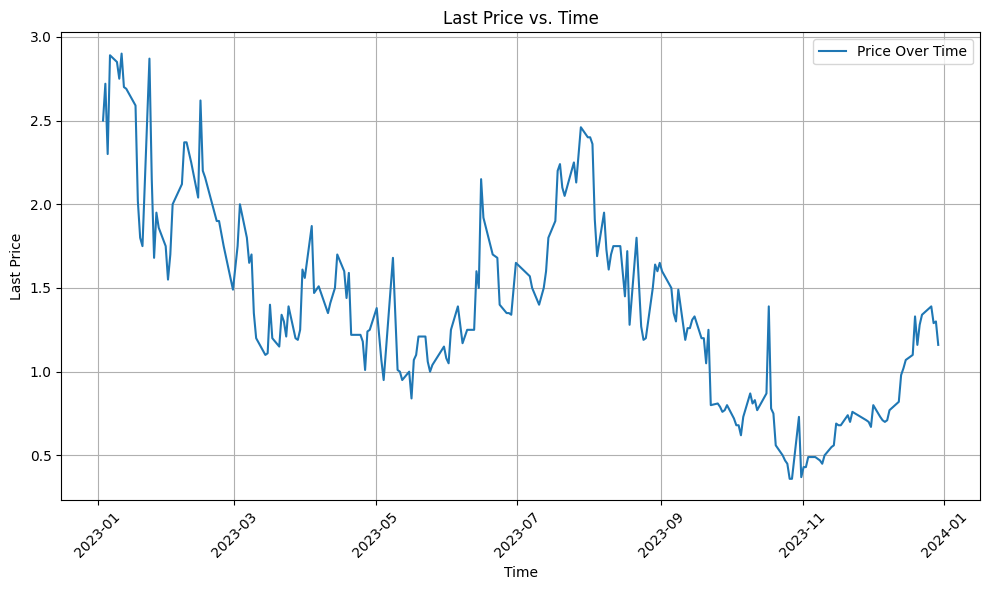

In [81]:
from polygon import RESTClient

# Replace 'YOUR_API_KEY' with your actual Polygon.io API key
client = RESTClient(api_key="MgiVqc5YtMoq2XMXevk8Ss46koUFb2g9")

# Define the options contract ticker
options_ticker = "O:SPY250117C00600000"  # Example: SPY call option expiring Dec 19, 2025, $650 strike

# Fetch daily aggregate bars for the specified date range
aggs = []
for agg in client.list_aggs(
    ticker=options_ticker,
    multiplier=1,
    timespan="day",
    from_="2023-01-01",
    to="2023-12-31",
    limit=5000,
):
    aggs.append(agg)

# for agg in aggs:
#     print(agg)


# Display the fetched aggregate data
from datetime import datetime

last_price = []
time = []

for agg in aggs:
    last_price.append(agg.close)  # Use dot notation to access the 'close' attribute
    time.append(agg.timestamp/1000)




# print(len(last_price))
# print(time)

#plotting time and last price
import matplotlib.pyplot as plt

from datetime import datetime

# Convert timestamps to datetime objects
time_converted = [datetime.fromtimestamp(t) for t in time]

# Plot the data
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(time_converted, last_price, label='Price Over Time')

# Formatting the plot
plt.title('Last Price vs. Time')
plt.xlabel('Time')
plt.ylabel('Last Price')
plt.grid(True)  # Add a grid for better readability
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent overlap

# Display the plot
plt.show()







In [82]:
import yfinance as yf
import pandas as pd

# Define stock ticker and date range
ticker = "SPY"
start_date = "2023-01-01"
end_date = "2023-12-31"

# Fetch historical stock price data
data = yf.download(ticker, start=start_date, end=end_date)

# Save the data to a CSV file
output_file = "SPY_stock_prices_2023.csv"
data.to_csv(output_file)

print(f"Data for {ticker} from {start_date} to {end_date} has been saved to {output_file}.")


[*********************100%***********************]  1 of 1 completed

Data for SPY from 2023-01-01 to 2023-12-31 has been saved to SPY_stock_prices_2023.csv.


/var/folders/xy/xf4_3fgd1_b11bqkvg4jmscw0000gn/T/ipykernel_47720/649960270.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Date'] = pd.to_datetime(cleaned_data['Date'], errors='coerce')
/var/folders/xy/xf4_3fgd1_b11bqkvg4jmscw0000gn/T/ipykernel_47720/649960270.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Close'] = pd.to_numeric(cleaned_data['Close'], errors='coerce')


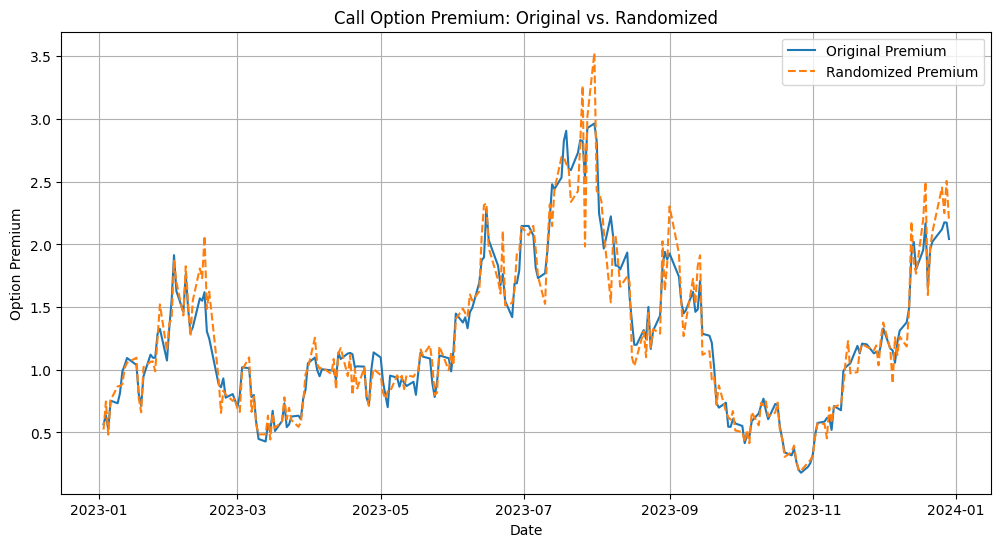

        Date   SPY Price  Call Option Premium  Randomized Call Option Premium
0 2023-01-03  380.820007             0.566086                        0.523249
1 2023-01-04  383.760010             0.637573                        0.746620
2 2023-01-05  379.380005             0.524862                        0.483026
3 2023-01-06  388.079987             0.753697                        0.757674
4 2023-01-09  387.859985             0.733096                        0.868056


In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# Black-Scholes Call Option Price Formula
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Load and clean data
file_path = 'SPY_stock_prices_2023.csv'
uploaded_data = pd.read_csv(file_path)

# Clean the uploaded data to extract relevant rows and columns
cleaned_data = uploaded_data.iloc[2:]
cleaned_data.columns = ['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
cleaned_data['Date'] = pd.to_datetime(cleaned_data['Date'], errors='coerce')
cleaned_data['Close'] = pd.to_numeric(cleaned_data['Close'], errors='coerce')
cleaned_data = cleaned_data.dropna()
cleaned_data = cleaned_data.sort_values('Date')

# Parameters
strike_price = 600  # Strike price
maturity_date = pd.Timestamp("2025-01-17")  # Maturity date
interest_rate = 0.05  # Annual risk-free rate (5%)
volatility = 0.12  # Annualized volatility (30%)
noise_level = 0.1  # 10% random noise

# Calculate option premiums using actual prices
option_prices = []
option_prices_random = []
dates = []

for _, row in cleaned_data.iterrows():
    current_date = row['Date']
    price = row['Close']
    time_to_maturity = (maturity_date - current_date).days / 365.0

    if time_to_maturity > 0:
        option_price = black_scholes_call(price, strike_price, time_to_maturity, interest_rate, volatility)
        random_factor = np.random.normal(1, noise_level)  # Random noise multiplier
        option_price_random = option_price * random_factor
    else:
        option_price = 0  # Option expires worthless after maturity
        option_price_random = 0

    option_prices.append(option_price)
    option_prices_random.append(option_price_random)
    dates.append(current_date)

# Create a DataFrame to store results
results = pd.DataFrame({
    'Date': dates,
    'SPY Price': cleaned_data['Close'].values,
    'Call Option Premium': option_prices,
    'Randomized Call Option Premium': option_prices_random
})

# Plot the original and randomized option premiums over time
plt.figure(figsize=(12, 6))
plt.plot(results['Date'], results['Call Option Premium'], label='Original Premium')
plt.plot(results['Date'], results['Randomized Call Option Premium'], label='Randomized Premium', linestyle='--')
plt.title('Call Option Premium: Original vs. Randomized')
plt.xlabel('Date')
plt.ylabel('Option Premium')
plt.grid()
plt.legend()
plt.show()

# Save results to a CSV file
results.to_csv("eth_spy_call_option_prices_with_noise.csv", index=False)

# Output preview of the DataFrame
print(results.head())


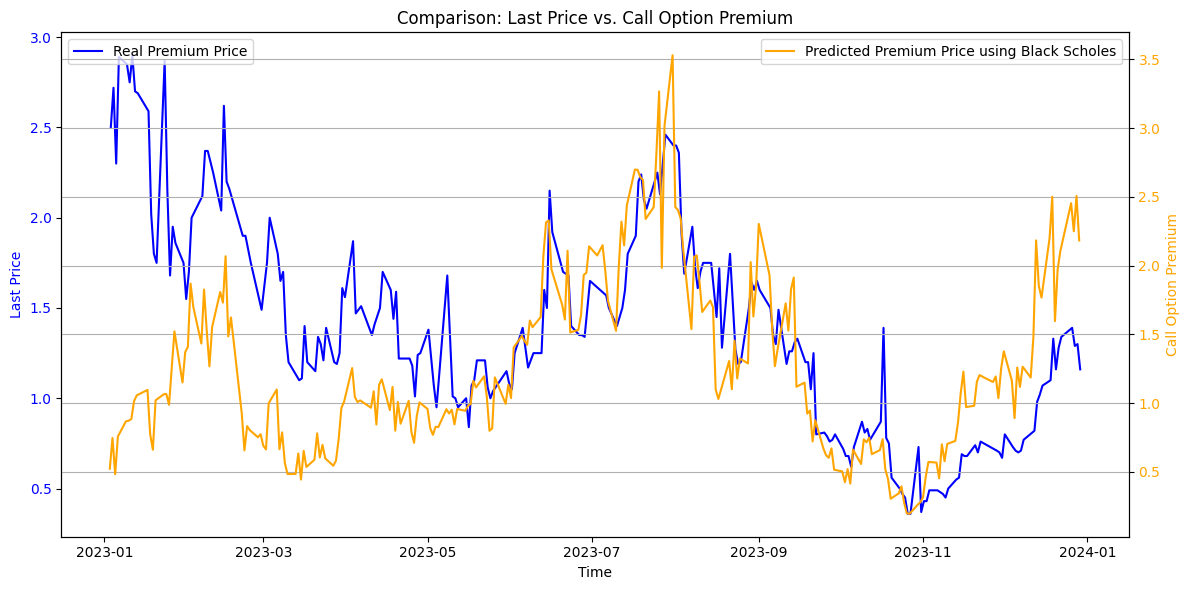

In [84]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# normalize the last price and results['Call Option Premium']

# import numpy as np

# last_price = np.array(last_price)
# last_price = (last_price - np.min(last_price)) / (np.max(last_price) - np.min(last_price))




# results['Call Option Premium'] = (results['Call Option Premium'] - min(results['Call Option Premium'])) / (max(results['Call Option Premium']) - min(results['Call Option Premium']))



# Plot Last Price on the primary y-axis
ax1.plot(time_converted, last_price, label='Real Premium Price', color='blue')
ax1.set_xlabel('Time')
ax1.set_ylabel('Last Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for the Call Option Premium
ax2 = ax1.twinx()
# ax2.plot(results['Date'], results['Call Option Premium'], label='Predicted Premium Price using Black Scholes', color='orange')
ax2.plot(results['Date'], results['Randomized Call Option Premium'], label='Predicted Premium Price using Black Scholes', color='orange')
ax2.set_ylabel('Call Option Premium', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')


# Add a title and grid
plt.title('Comparison: Last Price vs. Call Option Premium')
plt.grid(True)

# Add legends
fig.tight_layout()  # Adjust layout
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()



In [85]:
import numpy as np
import pandas as pd

# Ensure both datasets are aligned by date
# Create a DataFrame combining both datasets
data = pd.DataFrame({
    'Date': pd.to_datetime(time_converted),  # Convert time_converted to datetime
    'Last Price': last_price
})
data = data.merge(results[['Date', 'Call Option Premium']], on='Date', how='inner')  # Merge by Date

# Calculate the correlation coefficient
correlation = data['Last Price'].corr(data['Call Option Premium'])

print(f"Correlation index between Last Price and Call Option Premium: {correlation:.4f}")


Correlation index between Last Price and Call Option Premium: nan
